In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# filepath = os.path.join("logs", "manual_testing", "all_injured_10_infected")
# filepath = os.path.join("logs", "manual_testing", "10_percent_infected")
# filepath = os.path.join("logs", "manual_testing", "15_percent_infected")
# filepath = os.path.join("logs", "manual_testing", "15_with_occupations")
filepath = os.path.join("logs", "manual_testing", "15_updated_model")
# filepath = os.path.join("logs", "manual_testing", "20_percent_infected")

collected_data = []

for folder in os.listdir(filepath):
    if os.path.isdir(os.path.join(filepath, folder)):
        for file in os.listdir(os.path.join(filepath, folder)):
            injured_bound, scram_bound = [int(x.split("b")[1]) for x in folder.split("_")]

            # parse results
            if file.startswith("results"):
                data = pd.read_csv(os.path.join(filepath, folder, file))
                collected_data.append({
                    'injured_bound': injured_bound,
                    'scram_bound': scram_bound,
                    'data': data.mean()
                })
            # read in actions
            elif file.startswith("actions"):
                pass
            # read config
            elif file.startswith("config"):
                pass

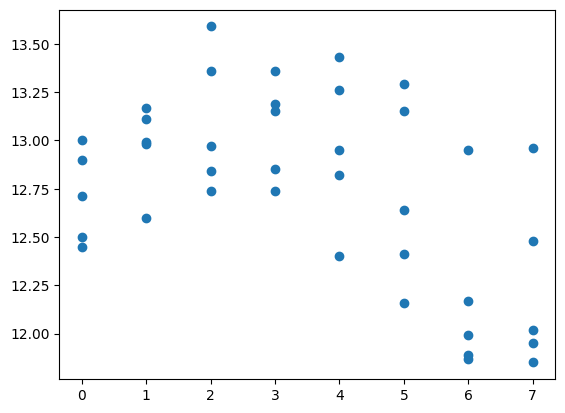

In [3]:
x = [x['injured_bound'] for x in collected_data]
y = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]

plt.plot(x, y, 'o')

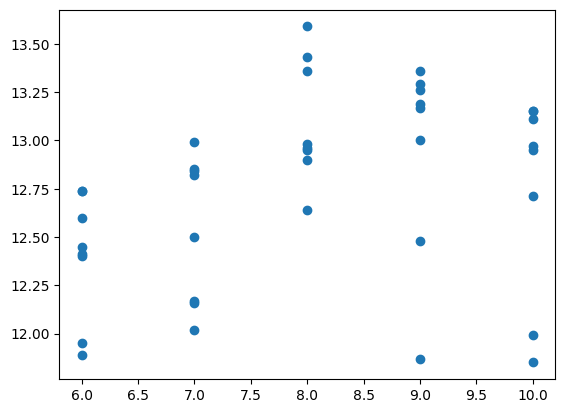

In [4]:
x = [x['scram_bound'] for x in collected_data]
y = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]

plt.plot(x, y, 'o')

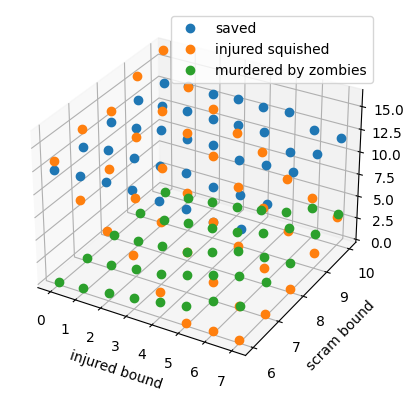

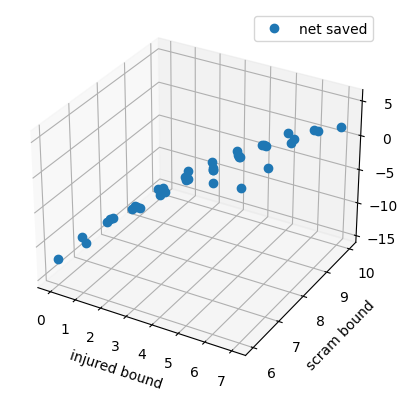

In [5]:
x = [x['injured_bound'] for x in collected_data]
y = [x['scram_bound'] for x in collected_data]
z_saved = [x['data']['saved_h'] + x['data']['saved_in'] for x in collected_data]
z_squish = [x['data']['killed_in_squish'] for x in collected_data]
z_zom = [x['data']['killed_zombie'] for x in collected_data]

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.set_xlabel("injured bound")
ax.set_ylabel("scram bound")

ax.plot(x, y, z_saved, 'o', label="saved")
ax.plot(x, y, z_squish, 'o', label="injured squished")
ax.plot(x, y, z_zom, 'o', label="murdered by zombies")

ax.legend()

z_com = [x['data']['saved_in'] - x['data']['killed_in_squish'] for x in collected_data]

fig2 = plt.figure()
# syntax for 3-D projection
ax2 = plt.axes(projection ='3d')

ax2.set_xlabel("injured bound")
ax2.set_ylabel("scram bound")

ax2.plot(x, y, z_com, 'o', label="net saved")

ax2.legend()

In [6]:
# find injured and scram bound that maximize saved mean
df = pd.DataFrame(data=[[x['injured_bound'], x['scram_bound'], x['data']['saved_h']] for x in collected_data], columns=["injured bound", "scram bound", "saved mean"])
df.loc[df['saved mean'].idxmax()]

injured bound     0.00
scram bound       9.00
saved mean       11.98
Name: 28, dtype: float64

In [7]:
filepath = os.path.join("logs", "manual_testing", "15_updated_model","ib0_sb10", "results.csv")
data = pd.read_csv(filepath)

data.loc[data['saved_h'].idxmax()]
# data.mean()

# filepath = os.path.join("logs", "manual_testing", "15_with_occupations","ib0_sb10", "results.csv")
# data = pd.read_csv(filepath)
# data.mean()


iteration           31
killed_h_squish      0
killed_in_squish     9
killed_zombie        0
skipped_in           0
saved_h             19
saved_in             1
killed_z             9
killed_c             0
saved_z              0
saved_c              0
Name: 31, dtype: int64